# Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nibabel as nib
%matplotlib inline

In [2]:
mri_file = nib.load("../imgs/nifti/15_axial_mprage_post_reformat.nii.gz")

In [3]:
mri_file.affine

array([[-9.96778905e-01, -7.51207322e-02,  2.80846506e-02,
         1.34375977e+02],
       [-8.01989511e-02,  9.33662534e-01, -3.49059254e-01,
        -8.03393402e+01],
       [-2.38913981e-17,  3.50187242e-01,  9.36679721e-01,
        -1.39001114e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [4]:
mri_data = mri_file.get_fdata()

In [5]:
affine = mri_file.affine
shape = mri_data.shape

In [6]:
print(shape)

(256, 256, 10)


In [7]:
mri_file.header.get_zooms()

(1.0, 1.0, 1.0)

In [8]:
nib.aff2axcodes(affine)

('L', 'A', 'S')

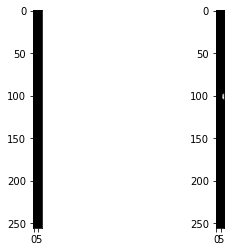

In [19]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(mri_data[20,:,:], cmap="gray")
axis[1].imshow(mri_data[40,:,:], cmap="gray") 

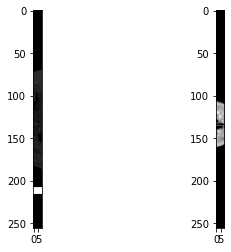

In [20]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(mri_data[:,30,:], cmap="gray")
axis[1].imshow(mri_data[:,200,:], cmap="gray") 

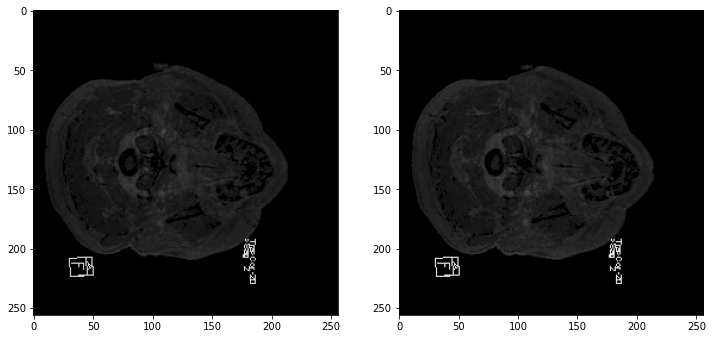

In [11]:
fig, axis = plt.subplots(1,2,figsize=(12,12))
axis[0].imshow(mri_data[:,:,4], cmap="gray")
axis[1].imshow(mri_data[:,:,3], cmap="gray") 

## Transformation

In [12]:
voxel_coords = np.array((0,0,0,1))

In [13]:
voxel_coords

array([0, 0, 0, 1])

In [14]:
physical_coords = affine @ voxel_coords

In [15]:
physical_coords

array([ 134.37597656,  -80.33934021, -139.00111389,    1.        ])

In [16]:
affine[:, 3:]

array([[ 134.37597656],
       [ -80.33934021],
       [-139.00111389],
       [   1.        ]])

In [17]:
voxel_coords_manual = np.array((0,0,0))
physical_coords_manual = affine[:3, :3] @ voxel_coords_manual
physical_coords_manual += affine[:3, 3]
physical_coords_manual 

array([ 134.37597656,  -80.33934021, -139.00111389])

In [18]:
physical_coords = [ 134.37597656,  -80.33934021, -139.00111389,    1.        ]
(np.linalg.inv(affine) @ physical_coords).round()

array([0., 0., 0., 1.])

## Resampling

In [23]:
print(mri_data.shape)
print(mri_file.header.get_zooms())

(256, 256, 10)
(1.0, 1.0, 1.0)


In [24]:
import nibabel.processing

In [25]:
voxel_size = (2,2,2)
mri_resized = nibabel.processing.conform(mri_file, (128,128,100), voxel_size, orientation="PSR")
mri_resized_data = mri_resized.get_fdata()

In [26]:
print(mri_resized.shape)
print(mri_resized.header.get_zooms())

(128, 128, 100)
(2.0, 2.0, 2.0)
